In [162]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

from util import plot_confusion_matrix

# Introduction
---
For today's tutorial, I will show the demos of Logistic Regression and SVC (Support Vector Classification).
While taking this tutorial, you can run this notebook step by step.
I will use the python package called *scikit-learn* for models and *pandas* for feature visualization.

---

# Logistic Regression
---
In this section, I will show the demo of Logistic Regression to predict whether the tumor is malignant or benign (you do not need to worry about these words).
More specifically, it conducts binary classification.

---
    
## Table of Contents
- Data Preparation (Visualization)
- Training
- Evaluation
- Confusion Matrix

---

## References
- [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

---

## Data Preparation (Visualization)
---
I will use [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), which is used for binary classification.
It includes 30 features (attributes) of tumors and we need to judge whether the tumor is malignant or benign from these features.
This dataset is available on *scikit-learn*, so we can call it through internet.

- Functions
    - `load_breast_cancer`: call dataset.
    - `train_test_split`: split dataset into the train and the test datasets.

---

In [196]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"# of training data : {len(y_train)}")
print(f"# of test data     : {len(y_test)}")

df = pd.DataFrame(X_train, columns=data.feature_names)
df.describe()

# of training data : 455
# of test data     : 114


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


## Training
---
Let's train your own logistic regression model.
We have two hyper-parameters for the model.
You can change these parameters to define different models.

- Functions
    - `LogisticRegression`: Define Logistic Regression Models.
    - `fit`: Train the model.
    

- Hyper-Parameters
    - `penalty`: the norm of the penalty: 'none' or 'l2'
    - `C`: Inverse of regularization strength

---

In [209]:
# --- Adjustable Parameters --- #

penalty = "l2"
C = 1

# ----------------------------- #

clf = LogisticRegression(penalty=penalty, C=C)
clf.fit(X_train, y_train);

y_train_pred = clf.predict_proba(X_train) # We can use "clf.predict()" to directly get the prediction.
y_train_pred = np.argmax(y_train_pred, axis=1)
print(f"Train Accuracy : {clf.score(X_train, y_train)}")

Train Accuracy : 0.9516483516483516


## Evaluation
---
You can compute the test accuracy.


- Functions
    - `predict_proba`: Compute the probability
    - `predict`: Predict from the probability 
    - `score`: Compute accuracy
    
---

In [211]:
y_test_pred = clf.predict_proba(X_test) # We can use "clf.predict()" to directly get the prediction.
y_test_pred = np.argmax(y_test_pred, axis=1)
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Test  Accuracy : 0.956140350877193


---
When you analyze your model, observing accuracy is not enough and you can not validate your model with only accuracy.
I will show you the more detailed analysis later in the SVC section.

---

# Support Vector Classification

---
In this section, I will show the demo of Support Vector Classification (SVC) to classify the hand-written digits.

---

## Table of Contents
- Data Preparation
- Data Visualization
- Training
- Evaluation

---

## References
- [Randomized Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [MNIST dataset for SVC](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

---

## Data Preparation
---
In this demo, I will use one of the most popular datasets named MNIST.
This includes the hand-written digits and mostly used for classification.

- Functions
    - `fetch_openml`: Call machine learning datasets (it takes time to download).

---

In [334]:
mnist = fetch_openml("mnist_784", data_home="mnist/", download=False)
X = mnist.data.values[:data_num]/255
y = np.array(mnist.target.values[:data_num], dtype=np.int)

In [335]:
classes = np.sort(pd.unique(y))
n_samples = X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"# of training data : {len(y_train)}")
print(f"# of test data     : {len(y_test)}")

# of training data : 800
# of test data     : 200


## Data Visualization
---
Since data is originally represented as 2d image, we can visualize it with the reshaping function.
Since some codes are unique to python (numpy) programming, you do not need to obsess with this cell.

---

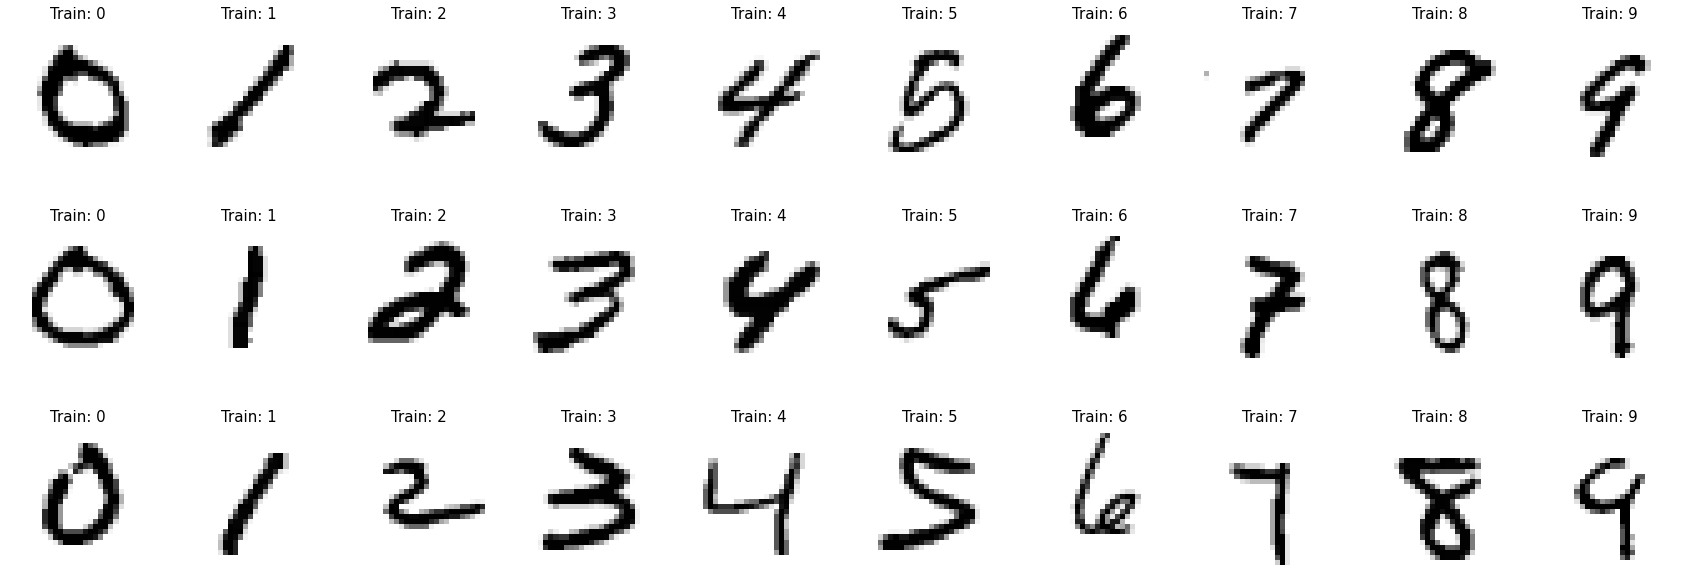

In [336]:
# --- Adjustable Parameters ---

display_num = 3

# -----------------------------

width = len(classes)
length = display_num
fig = plt.figure(figsize=(width*3, length*3.5))
for i in classes:
    images = X_train[y_train==i][:display_num]
    for j in range(display_num):
        ax = fig.add_subplot(length, width, j*width+i+1)
        ax.set_axis_off()
        image = images[j].reshape(28, 28)
        ax.imshow(image, cmap=plt.cm.gray_r)
        ax.set_title(f"Train: {i}", fontsize=15)

## Training
---
Let's train your own SVC to classify hand-written digits.
As explained in the lesson (please check *DDA3020_SVM-II.pdf*), in SVM (SVC), *kernels* can add complexity (capability) to models.
In this demo, I will use two kernels: linear and rbf; we can set it using a hyper-parameter `kernel`.

---

### Linear
We can set a hyper-parameter `C` for linear.

- Functions
    - `SVC`: Define Support Vector Classification.
    

- Hyper-Parameters
    - `C`: Inverse of regularization strength
    
---

In [295]:
# --- Adjustable Parameters ---

C = 1.0
kernel = "linear"

# -----------------------------

clf = SVC(C=C, kernel=kernel)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print(f"Train Accuracy : {clf.score(X_train, y_train)}")

y_test_pred = clf.predict(X_test)
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Train Accuracy : 1.0
Test  Accuracy : 0.875


### Radial Basis Function (RBF)
---

We can set two hyper-parameters for rbf.

- Hyper-Parameters
    - `C`: Inverse of regularization strength
    - `gamma`: Kernel coefficient. We can add complexity to models with larger `gamma`.
        - Recall $K(x, x') = \exp(-\gamma\|x-x'\|^2)$
    
---

In [296]:
# --- Adjustable Parameters ---

C = 1.0
kernel = "rbf"
gamma = 0.1

# -----------------------------

clf = SVC(C=C, kernel=kernel, gamma=gamma)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print(f"Train Accuracy : {clf.score(X_train, y_train)}")

y_test_pred = clf.predict(X_test)
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Train Accuracy : 1.0
Test  Accuracy : 0.74


### Hyper-Parameters Tuning for RBF
---

Hyper-parameters are the parameters we set, so we are not sure if the chosen parameters are good or bad. 
Hyper-parameter tuning is an essential concept to machine learning to be confident with your hyper-parameters.
The most-known tuning method is Grid Search.
It generates candidates from a grid of parameter values you specify and find the hyper-parameters with the best result.
In this demo, I will use the more efficient one which is called Randomized Search.
It randomly generates candidates from the chosen range.


- Hyper-Parameters
    - `C`: Inverse of regularization strength
    - `gamma`: Kernel coefficient. We can add complexity to models with larger `gamma`.
        - Recall $K(x, x') = \exp(-\gamma\|x-x'\|^2)$
    
---

In [337]:
svc = SVC(kernel="rbf", random_state=42)
distributions = dict(
    C=loguniform(1e-2, 1e2),
    gamma=loguniform(1e-4, 1)
)
clf = RandomizedSearchCV(svc, distributions, random_state=42, n_iter=10, cv=3)
search = clf.fit(X_train, y_train)
best_params = search.best_params_
print(best_params)

{'C': 8.471801418819974, 'gamma': 0.024810409748678097}


In [338]:
clf = SVC(C=best_params["C"], kernel="rbf", gamma=best_params["gamma"])
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print(f"Train Accuracy : {clf.score(X_train, y_train)}")

y_test_pred = clf.predict(X_test)
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Train Accuracy : 1.0
Test  Accuracy : 0.905


## Evaluation
---
As I said, if you want to analyze your model, accuracy is not enough.
So, I will show some ways to interpret your models.

---

### Confusion Matrix
---
You can visualize [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to check more detailed errors.

---

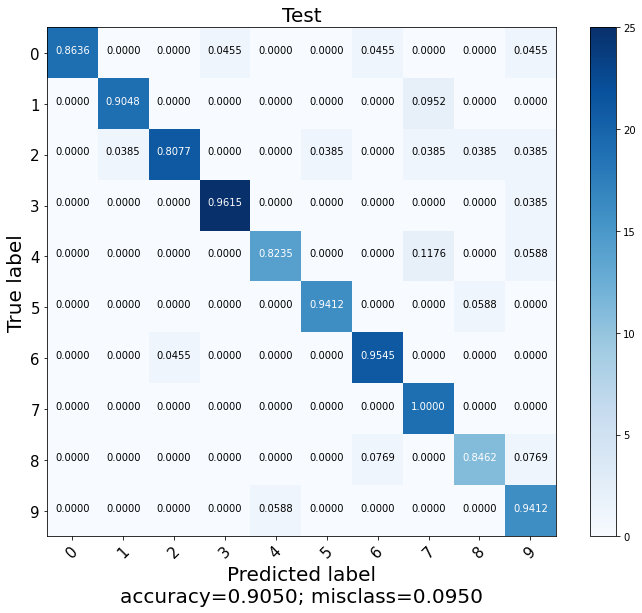

In [300]:
cm = confusion_matrix(y_test_pred, y_test)
plot_confusion_matrix(cm, classes, title="Test", fontsize=10)

### Samples of Correct Prediction
---
It is nice to visualize the samples that the model correctly predict.

---

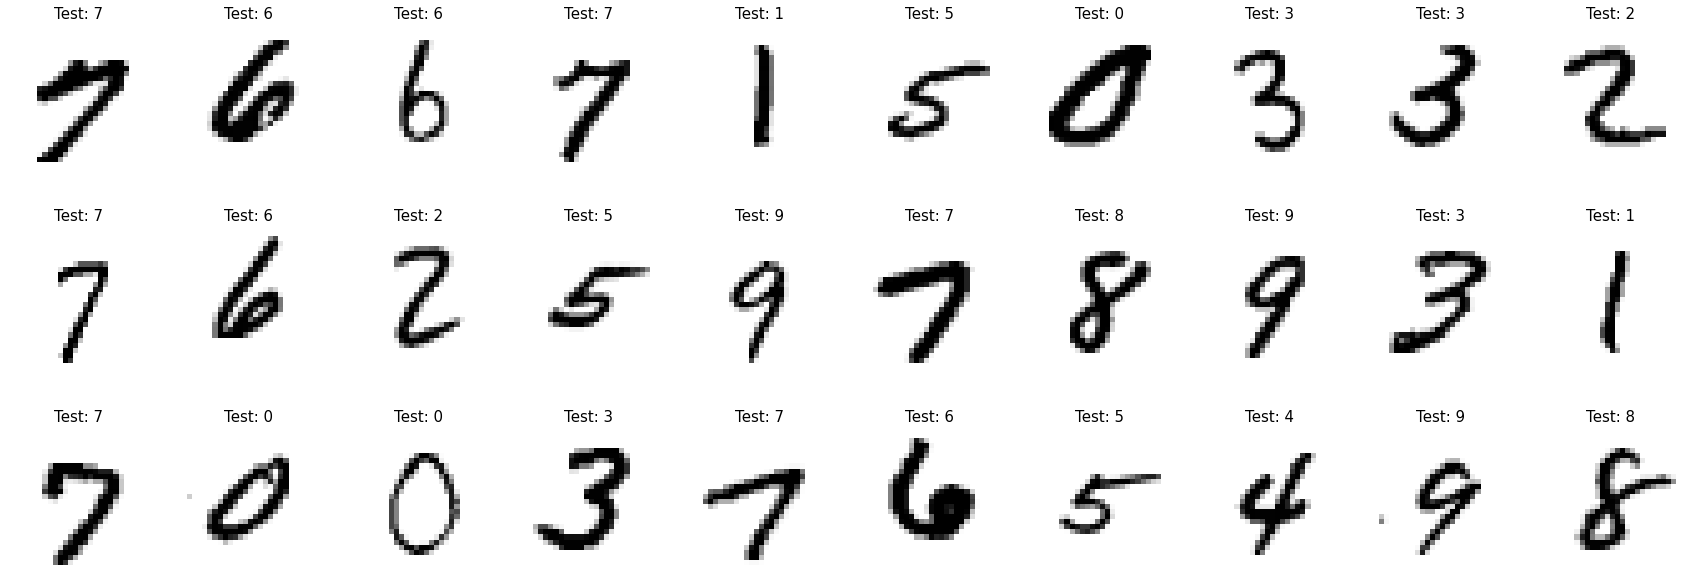

In [301]:
# --- Adjustable Parameters ---

width = 10
length = 3

# -----------------------------

index = y_test==y_test_pred
display_num = min(index.sum(), width*length)
images = X_test[index][:display_num]
true_labels = y_test[index][:display_num]

fig = plt.figure(figsize=(width*3, length*3.5))
for i in range(display_num):
    ax = fig.add_subplot(length, width, i+1)
    ax.set_axis_off()
    image = images[i].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Test: {true_labels[i]}", fontsize=15)

### Samples of Wrong Prediction
---
It is also nice to visualize the samples that the model failed to predict.

---

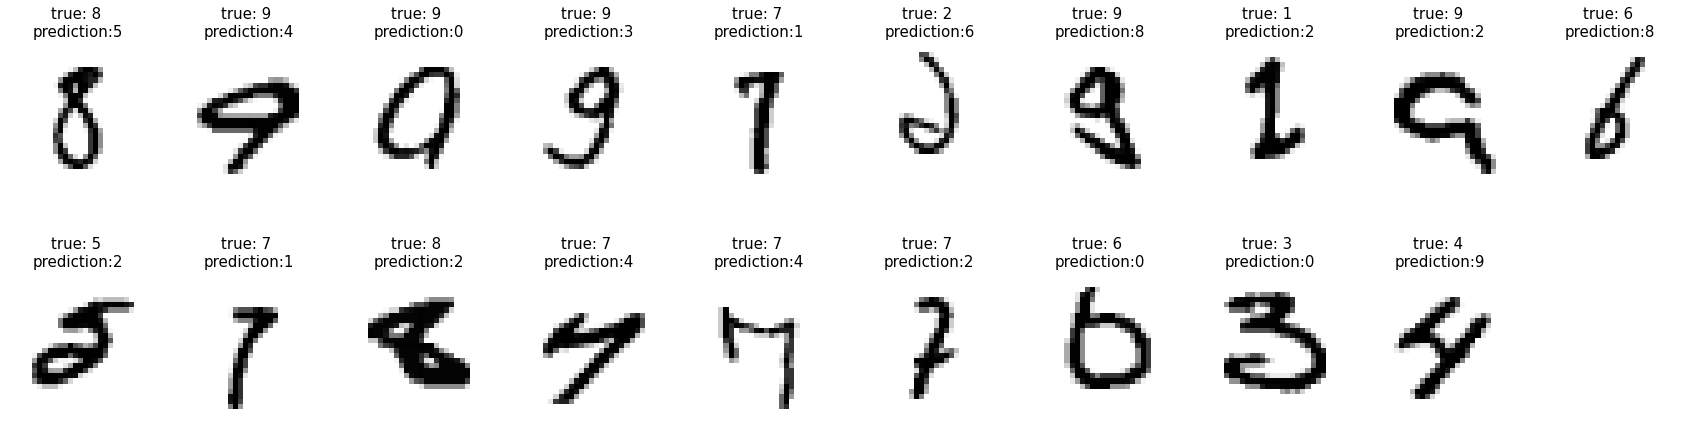

In [342]:
# --- Adjustable Parameters ---

width = 10
length = 3

# -----------------------------

index = y_test!=y_test_pred
display_num = min(index.sum(), width*length)
images = X_test[index][:display_num]
true_labels = y_test[index][:display_num]
predicted_labels = y_test_pred[index][:display_num]

fig = plt.figure(figsize=(width*3, length*4))
for i in range(display_num):
    ax = fig.add_subplot(length, width, i+1)
    ax.set_axis_off()
    image = images[i].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r)
#     ax.set_title(f"true: {true_labels[i]}, misclassified as {predicted_labels[i]}", fontsize=15)
    ax.set_title(f"true: {true_labels[i]} \nprediction:{predicted_labels[i]}", fontsize=15)